This Notebook is written for the CICALICS Academy 2019 - Machine Learning Workshop

The first example will demonstrate how Natural Language Processing can be used to enrich data or create labels. Example 2 is shows an unsupervised learning pipeline on sparse categorical data.

In [1]:
# import the pandas library for handling CSVs and table-type data 
# import numpy for some (simple) linear algebra
import pandas as pd
import numpy as np

Let's start with a very simple standard example of supervised ML:

![](https://scipy-lectures.org/_images/iris_versicolor.jpg)
Setosa
![](https://scipy-lectures.org/_images/iris_setosa.jpg)
Versicolor
![](https://scipy-lectures.org/_images/iris_virginica.jpg)
Virginica

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.data.shape

(150, 4)

In [4]:
pd.DataFrame(iris.data, columns = iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(iris.target) #categorical index

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# splitting the data

X_train, X_test, y_train, y_test = train_test_split(iris.data, y, test_size=0.2)

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class='multinomial',solver='lbfgs')

In [10]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
pd.crosstab(y_pred,y_test)

col_0,0,1,2
row_0,,,
0,6,0,0
1,0,13,1
2,0,1,9


## Case 1: Predicting categories with a self-trained model

In this case we will use work from Upwork.com (from a recent research paper) to predict task-categories.
Upwork https://www.upwork.com is a platform that connects freelancers with short term employers online. The dataset contains text, describing the task, as well as a category task. Unfortunately, not all task descriptions had these category labels. This is where we will use NLP + ML to create the misssing labels. 

Recent paper with Mareike Seifried and Tobias Kretschmer
https://conference.druid.dk/acc_papers/48ox0g0vwmp0vvx8gj7lzwhbimflf0.pdf

In [13]:
#read in the data
data = pd.read_csv('http://sds-datacrunch.aau.dk/public/data/upwork_aom_300k.csv')

In [14]:
#let's check it
data.head()

,Unnamed: 0,as_opening_title,main_category,sub_category
0,968913,Mailchimp Marketing Assistant,NaN,NaN
1,1855958,Manually submit 2000 names to an online form,Admin Support,Data Entry
2,109271,Design,NaN,NaN
3,1349850,Cool and Fun Graphic Designer/Illustrator need...,Design & Creative,Graphic Design
4,729567,Html/css/js,NaN,NaN


In [15]:
#some descriptives

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 4 columns):
Unnamed: 0          300000 non-null int64
as_opening_title    299998 non-null object
main_category       87967 non-null object
sub_category        87967 non-null object
dtypes: int64(1), object(3)
memory usage: 9.2+ MB


In [16]:
# selecting the empty ones

data_subset_empty = data[data['main_category'].isnull()]

In [17]:
# selecting the complete ones

data_full = data[~data['main_category'].isnull()]

In [18]:
#Some descriptives of the complete table

data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87967 entries, 1 to 299998
Data columns (total 4 columns):
Unnamed: 0          87967 non-null int64
as_opening_title    87967 non-null object
main_category       87967 non-null object
sub_category        87967 non-null object
dtypes: int64(1), object(3)
memory usage: 3.4+ MB


In [19]:
# Print out the different categories of tasks

for i in data_full['main_category'].unique():
    print(i)

Admin Support
Design & Creative
Sales & Marketing
Writing
Web, Mobile & Software Dev
Accounting & Consulting
Data Science & Analytics
IT & Networking
Translation
Engineering & Architecture
Customer Service
Legal
Web & Mobile Development


Now we need to construct our dependant and indepandant variables
The independant will be the vector representations of the texts
The dependant variable will be a the category of jobs

In [20]:
# import encoders for the dependant variable

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [21]:
# encode the dependant into dummy variables

encoder = LabelEncoder()
onehot = OneHotEncoder()

encoded = encoder.fit_transform(data_full['main_category']) #categorical index
y = onehot.fit_transform(encoded.reshape(-1,1)) # dummy matrix

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


We will be using spacy: https://spacy.io
It is a moden and fast NLP library that allows to do NLP tasks without engaging too much with linguistics and low-level tasks
you can download more and other models (also spanish) here https://spacy.io/usage/models

In [22]:
# In caggle you have direct access to the large model, which is great
import spacy
nlp = spacy.load("en_core_web_lg")

In [23]:
# Let's try it out on a sentence
sentence = nlp("The weather in Beijing is great")

In [24]:
# this returns a collection of tokens such as:
sentence[3]

Beijing

In [25]:
# Tokens contain many useful fetures
# Spacy recognizes parts of speech
# It also detects entities
print(sentence[3].pos_)
print(sentence.ents)
print(sentence.ents[0].label_)

PROPN
(Beijing,)
GPE


In [26]:
# Each token has a vector representation
sentence[3].vector

array([ 0.78468  ,  0.10513  ,  0.13023  , -0.28823  ,  0.19203  ,
        0.24491  ,  0.61093  , -0.1016   , -0.10848  , -0.10548  ,
       -1.0573   , -0.55142  , -0.097834 ,  0.029971 ,  0.2455   ,
        0.019219 ,  0.051751 ,  0.15903  , -0.11896  ,  0.56619  ,
        0.15302  ,  0.56737  ,  0.33601  , -0.22019  , -0.31817  ,
       -0.10002  , -0.11627  ,  0.14066  , -0.30163  ,  0.21938  ,
        0.34708  , -0.20998  ,  0.36514  ,  0.7125   , -0.26565  ,
       -0.0020111,  0.57861  , -0.2437   ,  0.086438 , -0.28916  ,
        0.44238  , -0.35974  , -0.079048 ,  0.35975  , -0.049142 ,
       -0.042851 ,  0.27653  , -0.4724   ,  0.022287 ,  0.15678  ,
       -0.91171  , -0.38461  , -0.23012  , -0.39248  ,  0.1007   ,
        0.3647   ,  0.40107  ,  0.27743  ,  0.27305  ,  0.40702  ,
       -0.30853  , -0.70626  ,  0.099023 , -0.68144  , -0.19626  ,
        0.32851  , -0.080628 ,  0.35589  , -0.35852  ,  0.40795  ,
       -0.41373  , -0.11791  , -0.63033  , -0.13327  ,  0.4129

In [27]:
# Sentences (several words) are represented as a mean of the 
# contained word-vectors
sentence.vector

array([ 1.63962647e-01,  2.87270010e-01,  4.02518883e-02, -1.38135329e-01,
        1.45690337e-01,  3.93215343e-02,  1.48931682e-01,  1.39666675e-02,
       -3.27511691e-02,  2.00518680e+00, -4.61487442e-01, -1.97942153e-01,
        1.62433332e-03,  1.26343677e-02, -1.05564833e-01, -1.71200171e-01,
       -6.80288300e-02,  1.10167170e+00, -3.57153341e-02, -6.48703352e-02,
       -1.14299498e-01, -7.42251575e-02,  3.42238359e-02, -1.05865277e-01,
        2.19966676e-02, -3.14793289e-02, -6.89138398e-02,  1.01022832e-01,
       -1.32354826e-01,  9.66366157e-02,  2.43727118e-02,  6.28475025e-02,
        3.86699773e-02,  2.17640564e-01,  1.15534998e-01, -4.82185185e-03,
        2.27431521e-01, -1.36983275e-01, -5.43190502e-02, -1.83192849e-01,
        2.13676855e-01,  8.67266655e-02, -1.74613334e-02, -3.25459987e-02,
        8.93228352e-02,  1.34326831e-01, -1.11066669e-01, -1.58855200e-01,
        2.73536723e-02, -9.26749930e-02, -8.79511610e-02,  8.34201649e-02,
       -4.89758365e-02, -

In [28]:
tokens = nlp(u'dog cat banana')

for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

dog dog 1.0
dog cat 0.80168545
dog banana 0.24327643
cat dog 0.80168545
cat cat 1.0
cat banana 0.28154364
banana dog 0.24327643
banana cat 0.28154364
banana banana 1.0


Let's get back to our problem. Now we will be trying to represent each job-description as a vector

In [29]:
# Vectorizing the text-data
vector_list = []

for doc in nlp.pipe(data_full['as_opening_title'], n_threads=4, batch_size=10000):
    vector_list.append(doc.vector)

In [30]:
# Assamble the list of vectors into a matrix
X = np.vstack(vector_list)

In [31]:
X.shape

(87967, 300)

In [32]:
X[:1,:]

array([[-6.61797523e-02, -1.05569877e-01, -2.54946977e-01,
         2.89416276e-02,  1.48502260e-01, -2.35250220e-03,
        -7.37528726e-02, -1.23254001e-01, -4.75450121e-02,
         1.81063378e+00, -3.05315763e-01,  1.64252996e-01,
         1.81349963e-02, -7.96169043e-02,  9.88330841e-02,
         4.69601229e-02, -1.53588623e-01,  1.52301371e+00,
        -7.83170089e-02, -1.15350010e-02,  7.05676228e-02,
        -1.52456000e-01, -1.37074381e-01,  7.36062527e-02,
        -1.23024993e-02,  1.73343003e-01, -1.57703429e-01,
        -2.26552755e-01,  1.18168369e-01, -9.71997529e-02,
         1.07889377e-01,  2.38962490e-02, -7.40383789e-02,
         1.74342752e-01, -1.98281258e-01, -2.40431756e-01,
        -3.19082662e-02,  3.07103116e-02, -5.13854958e-02,
        -1.87032372e-01, -5.80085777e-02,  8.26116279e-02,
         1.07144870e-01, -2.66625941e-01, -5.39526194e-02,
        -7.20162094e-02,  6.35398775e-02,  6.11887593e-03,
         1.00848749e-01,  4.09996286e-02, -3.64992112e-0

Having created the variables, we can now split the dataset and train some models

In [33]:
# splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, encoded, test_size=0.2)

In [34]:
# Training a logistic regression

classifier = LogisticRegression(multi_class='multinomial',solver='lbfgs')
classifier.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
# How are we doing?

from sklearn.metrics import classification_report

y_pred = classifier.predict(X_test)

classes_list = y_test.tolist() + y_pred.tolist()

labels = sorted(set(classes_list))
targets = encoder.inverse_transform(labels)

print(classification_report(y_test, y_pred, target_names = targets))

                            precision    recall  f1-score   support

   Accounting & Consulting       0.76      0.40      0.53       307
             Admin Support       0.63      0.69      0.66      2061
          Customer Service       0.67      0.35      0.46       126
  Data Science & Analytics       0.39      0.18      0.25       234
         Design & Creative       0.84      0.86      0.85      3802
Engineering & Architecture       0.73      0.61      0.67       345
           IT & Networking       0.69      0.49      0.57       352
                     Legal       0.72      0.40      0.52        57
         Sales & Marketing       0.67      0.60      0.63      1229
               Translation       0.87      0.83      0.85       839
  Web & Mobile Development       0.00      0.00      0.00         2
Web, Mobile & Software Dev       0.82      0.89      0.85      5387
                   Writing       0.81      0.81      0.81      2853

                  accuracy                    

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Finally, we will be training an artificial neural network
We will be using Keras for setting it up and training.

In [36]:
# Importing the keras library for deep learning

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/600px-Colored_neural_network.svg.png)

In [37]:
classifier = Sequential() 

#### RED ####
classifier.add(Dense(units = 256, activation='relu', input_dim = 300))

#### BLUE ####
classifier.add(Dropout(rate = 0.3))
classifier.add(Dense(units = 512, activation='relu'))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(units = 64,  activation='relu'))


#### GREEN ####
classifier.add(Dense(units = 13, activation='softmax'))


#### COMPILE ####
classifier.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [38]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               77056     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_4 (Dense)              (None, 13)                845       
Total params: 242,317
Trainable params: 242,317
Non-trainable params: 0
_________________________________________________________________


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
history = classifier.fit(X_train, y_train, batch_size= 500, epochs= 10, validation_data=(X_test, y_test))

Train on 70373 samples, validate on 17594 samples
Epoch 1/10
70373/70373 [==============================] - 4s 55us/step - loss: 1.0043 - acc: 0.6982 - val_loss: 0.7557 - val_acc: 0.7715
Epoch 2/10
70373/70373 [==============================] - 3s 44us/step - loss: 0.7376 - acc: 0.7747 - val_loss: 0.7028 - val_acc: 0.7867
Epoch 3/10
70373/70373 [==============================] - 3s 45us/step - loss: 0.6933 - acc: 0.7879 - val_loss: 0.6802 - val_acc: 0.7941
Epoch 4/10
70373/70373 [==============================] - 3s 45us/step - loss: 0.6658 - acc: 0.7948 - val_loss: 0.6704 - val_acc: 0.7983
Epoch 5/10
70373/70373 [==============================] - 3s 45us/step - loss: 0.6463 - acc: 0.8014 - val_loss: 0.6582 - val_acc: 0.7999
Epoch 6/10
70373/70373 [==============================] - 3s 48us/step - loss: 0.6253 - acc: 0.8063 - val_loss: 0.6486 - val_acc: 0.8041
Epoch 7/10
70373/70373 [==============================] - 3s 45us/step - loss: 0.6137 - acc: 0.8104 - val_loss: 0.6472 - val_acc

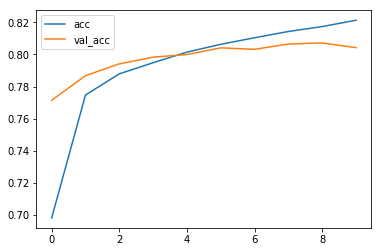

In [41]:
pd.DataFrame(history.history)[['acc','val_acc']].plot()

In [42]:
from sklearn.metrics import classification_report

y_true = np.argmax(y_test, axis=1)
labels = sorted(set([x[0] for x in y_true.tolist()]))
targets = encoder.inverse_transform(labels)

y_pred = classifier.predict_classes(X_test)

print(classification_report(y_true, y_pred, target_names=targets))

                            precision    recall  f1-score   support

   Accounting & Consulting       0.77      0.49      0.60       303
             Admin Support       0.68      0.72      0.70      2061
          Customer Service       0.64      0.43      0.51       123
  Data Science & Analytics       0.41      0.24      0.30       251
         Design & Creative       0.86      0.85      0.86      3710
Engineering & Architecture       0.66      0.64      0.65       348
           IT & Networking       0.71      0.43      0.54       377
                     Legal       0.73      0.51      0.60        63
         Sales & Marketing       0.72      0.62      0.67      1321
               Translation       0.85      0.91      0.88       823
  Web & Mobile Development       0.00      0.00      0.00         1
Web, Mobile & Software Dev       0.82      0.91      0.86      5442
                   Writing       0.87      0.82      0.84      2771

                  accuracy                    

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Let's see if we can use all our hard work for something
Now, we can use the model on data where we don't know the initial labels

In [43]:
# Extract a sample of 1000 rows from the empty-dataset
new_data = data_subset_empty.sample(1000)['as_opening_title']

In [44]:
# Reindex the sample (just to avoiod potential index-related-problems)
new_data.index = range(len(new_data))

In [45]:
# Vectorise the text with SpaCy

new_X = []

for doc in nlp.pipe(new_data, n_threads=4, batch_size=10000):
    new_X.append(doc.vector)

new_X = np.vstack(new_X)

In [46]:
# Make predictions with the neural network model

predictions = classifier.predict_classes(new_X)

In [47]:
# Write predictions into the dataset

result = pd.concat([new_data, pd.Series(predictions.tolist())], axis=1)

In [48]:
# Transform nummerical category-predictions into labels
result['category'] = encoder.inverse_transform(result[0])

In [49]:
result['category'].unique()

array(['Web, Mobile & Software Dev', 'Design & Creative', 'Admin Support',
       'Engineering & Architecture', 'Sales & Marketing', 'Writing',
       'Data Science & Analytics', 'Translation', 'Customer Service',
       'IT & Networking', 'Accounting & Consulting', 'Legal'],
      dtype=object)

In [50]:
# Quick check?

result[result.category == 'Writing']

,as_opening_title,0,category
8,Writers needed 10 unique articles,12,Writing
10,Cover Letter,12,Writing
13,Writer Wanted for Online Review Responses,12,Writing
22,More short India Videos,12,Writing
41,JFL SPA,12,Writing
46,Blog Writer Who Knows SEO (35+ blogs needed pe...,12,Writing
49,First Million project proofreading.,12,Writing
67,Natural Remedy Blog Writer,12,Writing
86,Immediate Proofreading and Editing for Boren F...,12,Writing
107,Writer to write Website Content,12,Writing


## Case2: Gig portfolios of online freelancers

![alt text](http://sds-datacrunch.aau.dk/public/adult-alone-bar-1308625.jpg)

You get gig-portfolio data for 1000 online freelancers – overall ~35k gigs. Given this data can you identify professional patterns?

This part of the tutorial is a short version based on the analysis performed for this paper:
**Career Paths in Digital Marketplaces: Same, same but different?**
With Mareike Seifried and Tobias Kretschmer
LMU Munich
Munich School of Management

 https://conference.druid.dk/acc_papers/48ox0g0vwmp0vvx8gj7lzwhbimflf0.pdf
* 

In [51]:
!pip3 install hdbscan

     |████████████████████████████████| 4.0MB 4.9MB/s 
  Installing build dependencies ... - \ | / - \ | / done
  Getting requirements to build wheel ... - done
    Preparing wheel metadata ... - done
  Created wheel for hdbscan: filename=hdbscan-0.8.22-cp36-cp36m-linux_x86_64.whl size=2475947 sha256=ef3780bcba53c5358a081e7c252cbfd7cf5c5c5c1c550dde4004bbf0ea8ecc08
  Stored in directory: /tmp/.cache/pip/wheels/6d/f9/db/f2e5e704427932f5b05c91fc520effbb0bd10ba8d73fd3bfc7
Successfully built hdbscan


In [52]:
# loading the data?
data = pd.read_csv('http://sds-datacrunch.aau.dk/public/feelance_eda.csv')

In [53]:
# Quick data exploration
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34606 entries, 0 to 34605
Data columns (total 13 columns):
Unnamed: 0          34606 non-null int64
as_job_type         34606 non-null object
as_opening_title    34606 non-null object
as_total_charge     25211 non-null float64
as_total_hours      14029 non-null float64
dev_country         34606 non-null object
econ_sit            34606 non-null object
fr_continent        34606 non-null object
skls_required_no    5659 non-null float64
sub_category        34606 non-null object
tenure_d            34374 non-null float64
hour_percent        34606 non-null float64
f_id                34606 non-null int64
dtypes: float64(5), int64(2), object(6)
memory usage: 3.4+ MB


In [54]:
data.head()

,Unnamed: 0,as_job_type,as_opening_title,as_total_charge,as_total_hours,dev_country,econ_sit,fr_continent,skls_required_no,sub_category,tenure_d,hour_percent,f_id
0,0,Hourly,Seo work. and outher stuff,941.500000,269.0,India,Emerging/Developing,Asia,NaN,SEO - Search Engine Optimization,574.0,0.928571,0
1,1,Hourly,PPC Keyword Sorting for Neeraj Sunghal,25.000000,5.0,India,Emerging/Developing,Asia,NaN,Data Entry,574.0,0.928571,0
2,2,Hourly,Shopify SEO Work Required,368.000000,92.0,India,Emerging/Developing,Asia,NaN,SEO - Search Engine Optimization,574.0,0.928571,0
3,3,Hourly,Need help in listing and SEO and product manag...,146.740005,22.0,India,Emerging/Developing,Asia,NaN,SEO - Search Engine Optimization,574.0,0.928571,0
4,4,Hourly,Need help with Adwords & Google Merchant Center,160.080002,24.0,India,Emerging/Developing,Asia,NaN,SEM - Search Engine Marketing,574.0,0.928571,0


In [55]:
# How does one portfolio look like?
data[data.f_id == 78].sub_category

3455    Desktop Software Development
3456             Scripts & Utilities
3457             Scripts & Utilities
3458           Other - Admin Support
3459    Desktop Software Development
3460    Other - Software Development
3461                 Web Development
3462                 Web Development
3463                 Web Development
3464                 Web Development
3465                 Web Development
3466    Other - Software Development
3467                 Web Development
3468                 Web Development
3469                 Web Development
3470                 Web Development
3471                 Web Development
Name: sub_category, dtype: object

A bit some thing on loops and slightly more advanced  stuff.

the next couple of cells will show how you can 
- add stuff to lists and how to 
- work with loops

In [56]:
empty_list = []

print(empty_list)

[]


In [57]:
empty_list.append(1)

print(empty_list)

[1]


In [58]:
empty_list.append("i don't want to be in that list")

print(empty_list)

[1, "i don't want to be in that list"]


In [59]:
empty_list.extend(['🐧','🍅','🤘'])

print(empty_list)

[1, "i don't want to be in that list", '🐧', '🍅', '🤘']


*From* here we can try to assemble job-portfolios by making a list of lists with performed gigs for individual workers

In [60]:
# individual freelancers
workers = data.f_id.unique()

In [61]:
#create empty list
stuff_people_do = []

for some_worker_id in workers: #initiate loop
  stuff = list(data[data.f_id == some_worker_id].sub_category) # extract portfolio for a single worker
  stuff_people_do.append((some_worker_id, stuff)) # append portfolio to the list of portfolios

In [62]:
#use pandas to make it into a datafrmae
portfolios = pd.DataFrame(stuff_people_do, columns = ['f_id', 'gig_portfolio'])
#Calculate the most common gig_activity
portfolios['max'] = portfolios['gig_portfolio'].map(lambda t: max(t))

Now we are going to use Gensim (a library for Natural Language Processing) to transform these protfolio lists into BoW representations

In [63]:
#Gensim is actually an NLP library but we will use it here to construct BagOfJobs representations of freelancer portfolios.
import gensim
from gensim.corpora.dictionary import Dictionary

In [64]:
# First we ceate a dicitonary - an index-subcategory mapping object

dictionary = Dictionary(portfolios['gig_portfolio'])

In [65]:
# Create a "corpus of portfolios" in BoW format
corpus = [dictionary.doc2bow(sequence) for sequence in portfolios['gig_portfolio']]

In [66]:
# Transform corpus into a matrix 
portfolio_matrix = gensim.matutils.corpus2dense(corpus=corpus, num_terms=len(dictionary))

In [67]:
portfolio_matrix.shape

(86, 1000)

In [68]:
# swap rows and columns with a transponse
portfolio_matrix = portfolio_matrix.T

Why should I trust this? Can we check if all the transformations didn't mess up things?

In [69]:
# portfolio of worker 0
portfolio_matrix[0]

array([1., 1., 1., 6., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

In [70]:
# what's the taks sub-category of index 3?
dictionary.get(3)

'SEM - Search Engine Marketing'

In [71]:
# How many times did the worker perform this gig?
data[data.f_id == 0].sub_category

0     SEO - Search Engine Optimization
1                           Data Entry
2     SEO - Search Engine Optimization
3     SEO - Search Engine Optimization
4        SEM - Search Engine Marketing
5        SEM - Search Engine Marketing
6        SEM - Search Engine Marketing
7        SEM - Search Engine Marketing
8                  Display Advertising
9        SEM - Search Engine Marketing
10    SEO - Search Engine Optimization
11    SEO - Search Engine Optimization
12              Article & Blog Writing
13       SEM - Search Engine Marketing
Name: sub_category, dtype: object

Now we sucessfully created "Bag-of-Gigs" representations of individual workers' portfolios
The matrix is however very sparse, as we can see (many zeros and  only some non-0 values) as one would expect that.
PCA is not a good choice here. Instead we will use Non-negative Matrix Factorization (NMF), which has the tendency to very well "squash" the data into interpretable latent themes:

In Natural Language Processing, such themes are called topics and what we are going to do now is referred to as Vector Space Modelling or Topic Modelling

The coolest thing about that identified components are very interopretable. This is because the model is build on assumptions about the world related to co-occurence.

In [72]:
# Let's try to bring it all the way down to 5 dimensions

from sklearn.decomposition import NMF

model = NMF(n_components=5)

portfolio_matrix_reduced = model.fit_transform(portfolio_matrix)

In [73]:
# what are these components?
model.components_.shape

(5, 86)

In [74]:
# Make a dataframe
components_df = pd.DataFrame(model.components_, columns=list(dictionary.values()))

In [75]:
components_df

,Article & Blog Writing,Data Entry,Display Advertising,SEM - Search Engine Marketing,SEO - Search Engine Optimization,.,3D Modeling & CAD,General Translation,Presentations,Web & Mobile Design,...,Architecture,Grant Writing,Resumes & Cover Letters,Corporate Law,Medical Translation,Electrical Engineering,Interior Design,Family Law,Contract Manufacturing,Mechanical Engineering
0,0.107932,0.170203,0.019552,0.006089,0.000000,0.026947,0.341505,0.000000,0.577884,0.589457,...,0.004031,0.000000,0.004160,0.000234,0.000000,0.012077,0.005639,0.000000,0.000000,0.002132
1,0.336679,0.035987,0.014193,0.178154,0.681591,0.161696,0.180080,0.000000,0.000000,4.599583,...,0.017891,0.000229,0.003596,0.000622,0.000000,0.011339,0.010830,0.000078,0.000245,0.002239
2,4.762109,0.000000,0.001032,0.000000,0.040723,0.572705,0.007302,0.000000,0.018811,0.000000,...,0.000000,0.003040,0.022388,0.000159,0.000094,0.001866,0.000145,0.000009,0.000000,0.000031
3,1.915879,0.000000,0.000951,0.000000,0.081362,0.188402,0.001894,18.487296,0.085491,0.000000,...,0.000000,0.027489,0.011583,0.000957,0.006599,0.000163,0.000000,0.000503,0.000000,0.000000
4,1.847351,12.810827,0.044069,0.036026,0.619603,0.171968,0.006375,0.000000,0.127033,0.000000,...,0.003891,0.002139,0.007257,0.002020,0.000329,0.002132,0.000458,0.000219,0.001693,0.005284


In [76]:
# Select a component
component = components_df.iloc[0,:]

# Print result of nlargest
print(component.nlargest())

Graphic Design            23.349292
Logo Design & Branding     9.242412
Illustration               1.788229
Web & Mobile Design        0.589457
Presentations              0.577884
Name: 0, dtype: float64


In [77]:
# Import clustering and dimensionality reduction
# HDBSCAN won't work with numpy < 1.16

import hdbscan
import umap

# Also, we will now need some visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [78]:
# Let's try not to overdo things and maybe keep it at 20 components

model = NMF(n_components=20)

portfolio_matrix_reduced = model.fit_transform(portfolio_matrix)

In [79]:
# Note that the standard setting of UMAP will produce 2 dimensions
embedding = umap.UMAP(n_neighbors=15, metric='cosine').fit_transform(portfolio_matrix_reduced)

/opt/conda/lib/python3.6/site-packages/umap/umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../opt/conda/lib/python3.6/site-packages/umap/umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/opt/conda/lib/python3.6/site-packages/numba/compiler.py:742: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../opt/conda/lib/python3.6/site-packages/umap/umap_.py", line 350:
@numba.jit()
def fuzzy_simplicial_set(
^

  self.func_ir.loc))
/opt/conda/lib/python3.6/site-packages/numba/compiler.py:751: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object

You can read more about


- UMAP here: https://umap-learn.readthedocs.io/en/latest/
- HDBSCAN here: https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html

HDBSCAN is a recent hi-performance density based clustering approach


In [80]:
# Now, we will feed the 2-dimensional representation into HDBSCAN
# Warning can be ignored for now

clusterer = hdbscan.HDBSCAN(min_cluster_size=50, 
                            min_samples=50, 
                            leaf_size=40, 
                            #core_dist_n_jobs=16, 
                            prediction_data=True)
clusterer.fit(embedding)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_method='eom',
        core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=50, min_samples=50, p=None,
        prediction_data=True)

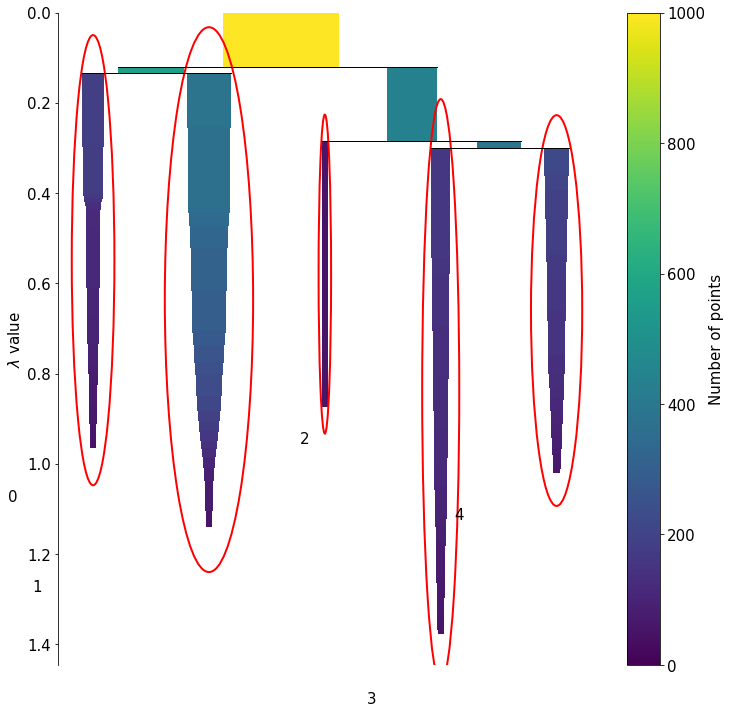

In [81]:
pal = sns.color_palette("Paired", n_colors = len(set(clusterer.labels_)))[1:]
plt.figure(figsize=(12,12))
plt.rcParams.update({'font.size': 15})
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=pal, label_clusters=True)

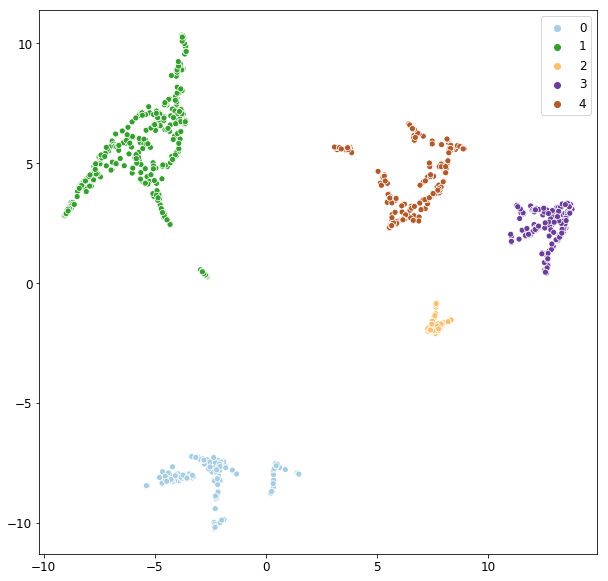

In [82]:
# Scatterplor of the UMAP embeddings with cluster-coloring
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10,10))
g = sns.scatterplot(*embedding.T, 
                hue=clusterer.labels_, 
                legend='full',
                palette = 'Paired')
legend = g.get_legend()

In [83]:
portfolios['cluster'] = clusterer.labels_

In [84]:
import itertools
from collections import Counter

In [85]:
counter = Counter(list(itertools.chain(*portfolios[portfolios.cluster == 1]['gig_portfolio'])))
counter.most_common(20)

[('Web Development', 5749),
 ('Web & Mobile Design', 1414),
 ('Ecommerce Development', 610),
 ('Graphic Design', 390),
 ('3D Modeling & CAD', 379),
 ('Mobile Development', 334),
 ('Network & System Administration', 298),
 ('Other - Software Development', 258),
 ('Data Entry', 215),
 ('Scripts & Utilities', 185),
 ('Desktop Software Development', 128),
 ('QA & Testing', 110),
 ('SEO - Search Engine Optimization', 79),
 ('.', 77),
 ('Logo Design & Branding', 63),
 ('Article & Blog Writing', 62),
 ('Web Research', 61),
 ('Personal / Virtual Assistant', 54),
 ('Other - Writing', 47),
 ('Database Administration', 37)]